# Data exploration

Visual exploration of the input data.

In [9]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
from reco.plotting import plot_tracksters, get_event_window

%matplotlib inline

ds_name = "MultiParticle"
file_name = "new_ntuples_15163313_7.root"

data_root = "data"
raw_dir = f"/Users/ecuba/data/{ds_name}"

file_path = f"{raw_dir}/{file_name}"
tracksters = uproot.open({file_path: "ticlNtuplizer/tracksters"})

In [10]:
eid = 20
vx = ak.flatten(tracksters["vertices_x"].array()[0:eid])
vy = ak.flatten(tracksters["vertices_y"].array()[0:eid])
vz = ak.flatten(tracksters["vertices_z"].array()[0:eid])
ve = ak.flatten(tracksters["vertices_energy"].array()[0:eid])

xlim, ylim, zlim = get_event_window(vx, vy, vz, ve)

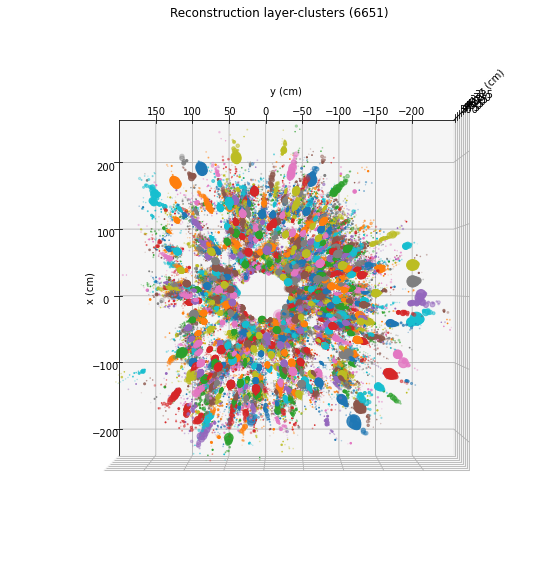

In [11]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")
# plt.axis('off')

for x, y, z, e in zip(vx, vy, vz, ve):
    ax1.scatter(x, y, z, s=e)

ax1.set_title(f"Reconstruction layer-clusters ({len(vx)})")
ax1.view_init(90, 0)